In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [55]:
time_series_df = pd.read_csv('time_series_od.csv', parse_dates=[1], index_col=0)
time_series_df['Date'] = pd.to_datetime(time_series_df['Date'], format='%Y-%m-%d')
time_series_df.set_index('Date', inplace=True)
time_series_df = time_series_df.squeeze()
time_series_df

Date
2012-01-31    51.637723
2012-02-29    51.632639
2012-03-31    50.823663
2012-04-30    49.123303
2012-05-31    49.737167
                ...    
2028-04-30    53.784390
2028-05-31    57.147117
2028-06-30    57.809668
2028-07-31    58.691266
2028-08-31    59.024921
Name: value, Length: 200, dtype: float64

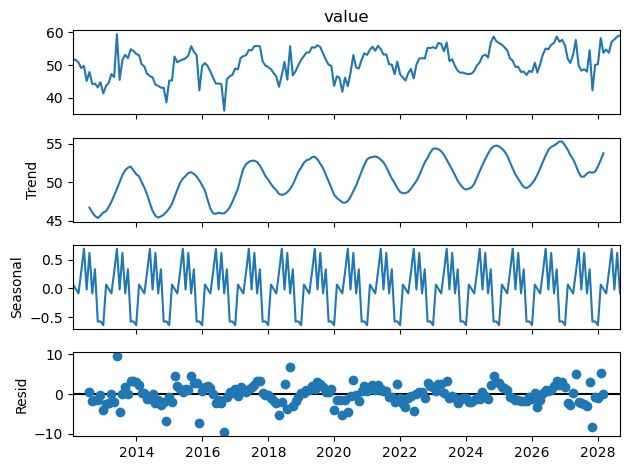

In [70]:
nresult = seasonal_decompose(time_series_df, model='additive', period=12)
nresult.plot()
plt.show()

In [76]:
start_date = datetime(2015,1,1)
end_date = datetime(2021,1,1)
lim_time_series_df = time_series_df[start_date : end_date]

In [77]:
lim_time_series_df[datetime(2018,6,1)] = 70

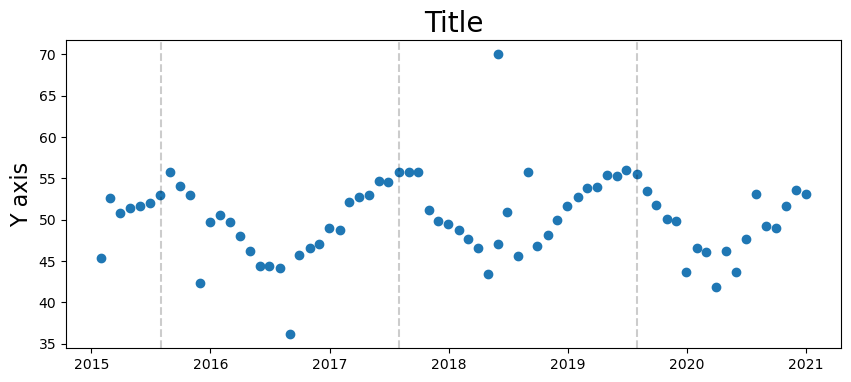

In [80]:
plt.figure(figsize=(10,4))
plt.scatter(lim_time_series_df.index, lim_time_series_df)
plt.title('Title', fontsize=20)
plt.ylabel('Y axis', fontsize=16)

for year in range(start_date.year, end_date.year, 2):
    plt.axvline(pd.to_datetime(str(year)+'-08-01'), color='k', linestyle='--', alpha=0.2)

In [62]:
first_df = lim_time_series_df.diff()[1:]